<a href="https://colab.research.google.com/github/liangli217/PyTorch_ML/blob/main/custon_DNN_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem: Implement a Deep Neural Network

### Problem Statement
You are tasked with constructing a **Deep Neural Network (DNN)** model to solve a regression task using PyTorch. The objective is to predict target values from synthetic data exhibiting a non-linear relationship.

### Requirements
Implement the `DNNModel` class that satisfies the following criteria:

1. **Model Definition**:
   - The model should have:
     - An **input layer** connected to a **hidden layer**.
     - A **ReLU activation function** for non-linearity.
     - An **output layer** with a single unit for regression.

<details> <summary>💡 Hint</summary> - Use `nn.Sequential` to simplify the implementation of the `DNNModel`. - Experiment with different numbers of layers and hidden units to optimize performance. - Ensure the final layer has a single output unit (since it's a regression task). </details> <details> <summary>💡 Bonus: Try Custom Loss Functions</summary> Experiment with custom loss functions (e.g., Huber Loss) and compare their performance with MSE. </details>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [35]:
# Generate synthetic data
torch.manual_seed(42)
X = torch.rand(100, 2) * 10  # 100 data points with 2 features
y = (X[:, 0] + X[:, 1] * 2).unsqueeze(1) + torch.randn(100, 1)  # Non-linear relationship with noise

In [26]:
(X[:, 0] + X[:, 1] * 2).shape

torch.Size([100])

In [36]:
X.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

In [37]:
# Define the Deep Neural Network Model
class DNNModel(nn.Module):
    def __init__(self):

      super().__init__()

      self.linear = nn.Linear(2,10)
      self.relu = nn.ReLU()
      self.output = nn.Linear(10,1)



    def forward(self, x):
        ...
        return self.output(self.relu(self.linear(x)))

In [29]:
# Initialize the model, loss function, and optimizer
model = DNNModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    predictions = model(X)
    loss = criterion(predictions, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Log progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# Testing on new data
X_test = torch.tensor([[4.0, 3.0], [7.0, 8.0]])
with torch.no_grad():
    predictions = model(X_test)
    print(f"Predictions for {X_test.tolist()}: {predictions.tolist()}")

Epoch [100/1000], Loss: 3.2488
Epoch [200/1000], Loss: 0.7234
Epoch [300/1000], Loss: 0.7227
Epoch [400/1000], Loss: 0.7224
Epoch [500/1000], Loss: 0.7221
Epoch [600/1000], Loss: 0.7220
Epoch [700/1000], Loss: 0.7220
Epoch [800/1000], Loss: 0.7219
Epoch [900/1000], Loss: 0.7219
Epoch [1000/1000], Loss: 0.7218
Predictions for [[4.0, 3.0], [7.0, 8.0]]: [[9.915581703186035], [23.096363067626953]]


In [19]:
model(X).shape

torch.Size([100, 1])

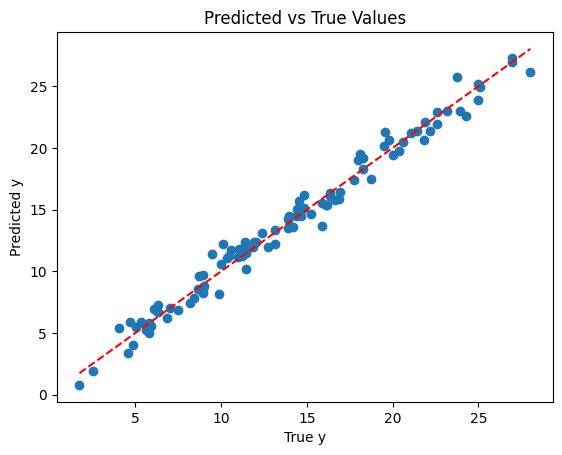

In [22]:
from matplotlib import pyplot as plt
plt.scatter(y, model(X).detach().numpy())
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.title("Predicted vs True Values")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # perfect line
plt.show()

**Custom Loss using Huber Loss**

In [49]:
# Custom Loss function
def loss_function(y, predictions,threshold):

  err = torch.abs(y - predictions)
  loss = torch.where(err<=threshold, 0.5*err**2, threshold*(err-0.5*threshold))

  return torch.mean(loss)


In [51]:
# Generate synthetic data
torch.manual_seed(42)
X = torch.rand(100, 2) * 10  # 100 data points with 2 features
y = (X[:, 0] + X[:, 1] * 2).unsqueeze(1) + torch.randn(100, 1)  # Non-linear relationship with noise

In [52]:
# Training loop
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    predictions = model(X)
    loss = loss_function(predictions, y, 1)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()



    optimizer.step()

    # Log progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# Testing on new data
X_test = torch.tensor([[4.0, 3.0], [7.0, 8.0]])
with torch.no_grad():
    predictions = model(X_test)
    print(f"Predictions for {X_test.tolist()}: {predictions.tolist()}")

Epoch [100/1000], Loss: 0.3229
Epoch [200/1000], Loss: 0.3229
Epoch [300/1000], Loss: 0.3233
Epoch [400/1000], Loss: 0.3229
Epoch [500/1000], Loss: 0.3229
Epoch [600/1000], Loss: 0.3228
Epoch [700/1000], Loss: 0.3228
Epoch [800/1000], Loss: 0.3228
Epoch [900/1000], Loss: 0.3228
Epoch [1000/1000], Loss: 0.3227
Predictions for [[4.0, 3.0], [7.0, 8.0]]: [[9.95471477508545], [23.166683197021484]]
